In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#from sklearn.neural_network import MLPClassifier
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

import json
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 20]
%config InlineBackend.figure_format = 'retina'

In [2]:
seed = 7

In [3]:
data = load_digits(return_X_y=False, as_frame = True)

X_data = pd.DataFrame(data.data)
Y_data = pd.DataFrame(data.target)

In [4]:
Y_data

,target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [5]:
Y_data.head()

,target
0,0
1,1
2,2
3,3
4,4


In [6]:
len(data.feature_names)

64

In [7]:
list(data.target_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
X_data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
Y_data.head(10)

,target
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [10]:
X_data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [11]:
X_data.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_3    float64
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
Length: 64, dtype: object

In [12]:
X_data.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

## Univariable plots

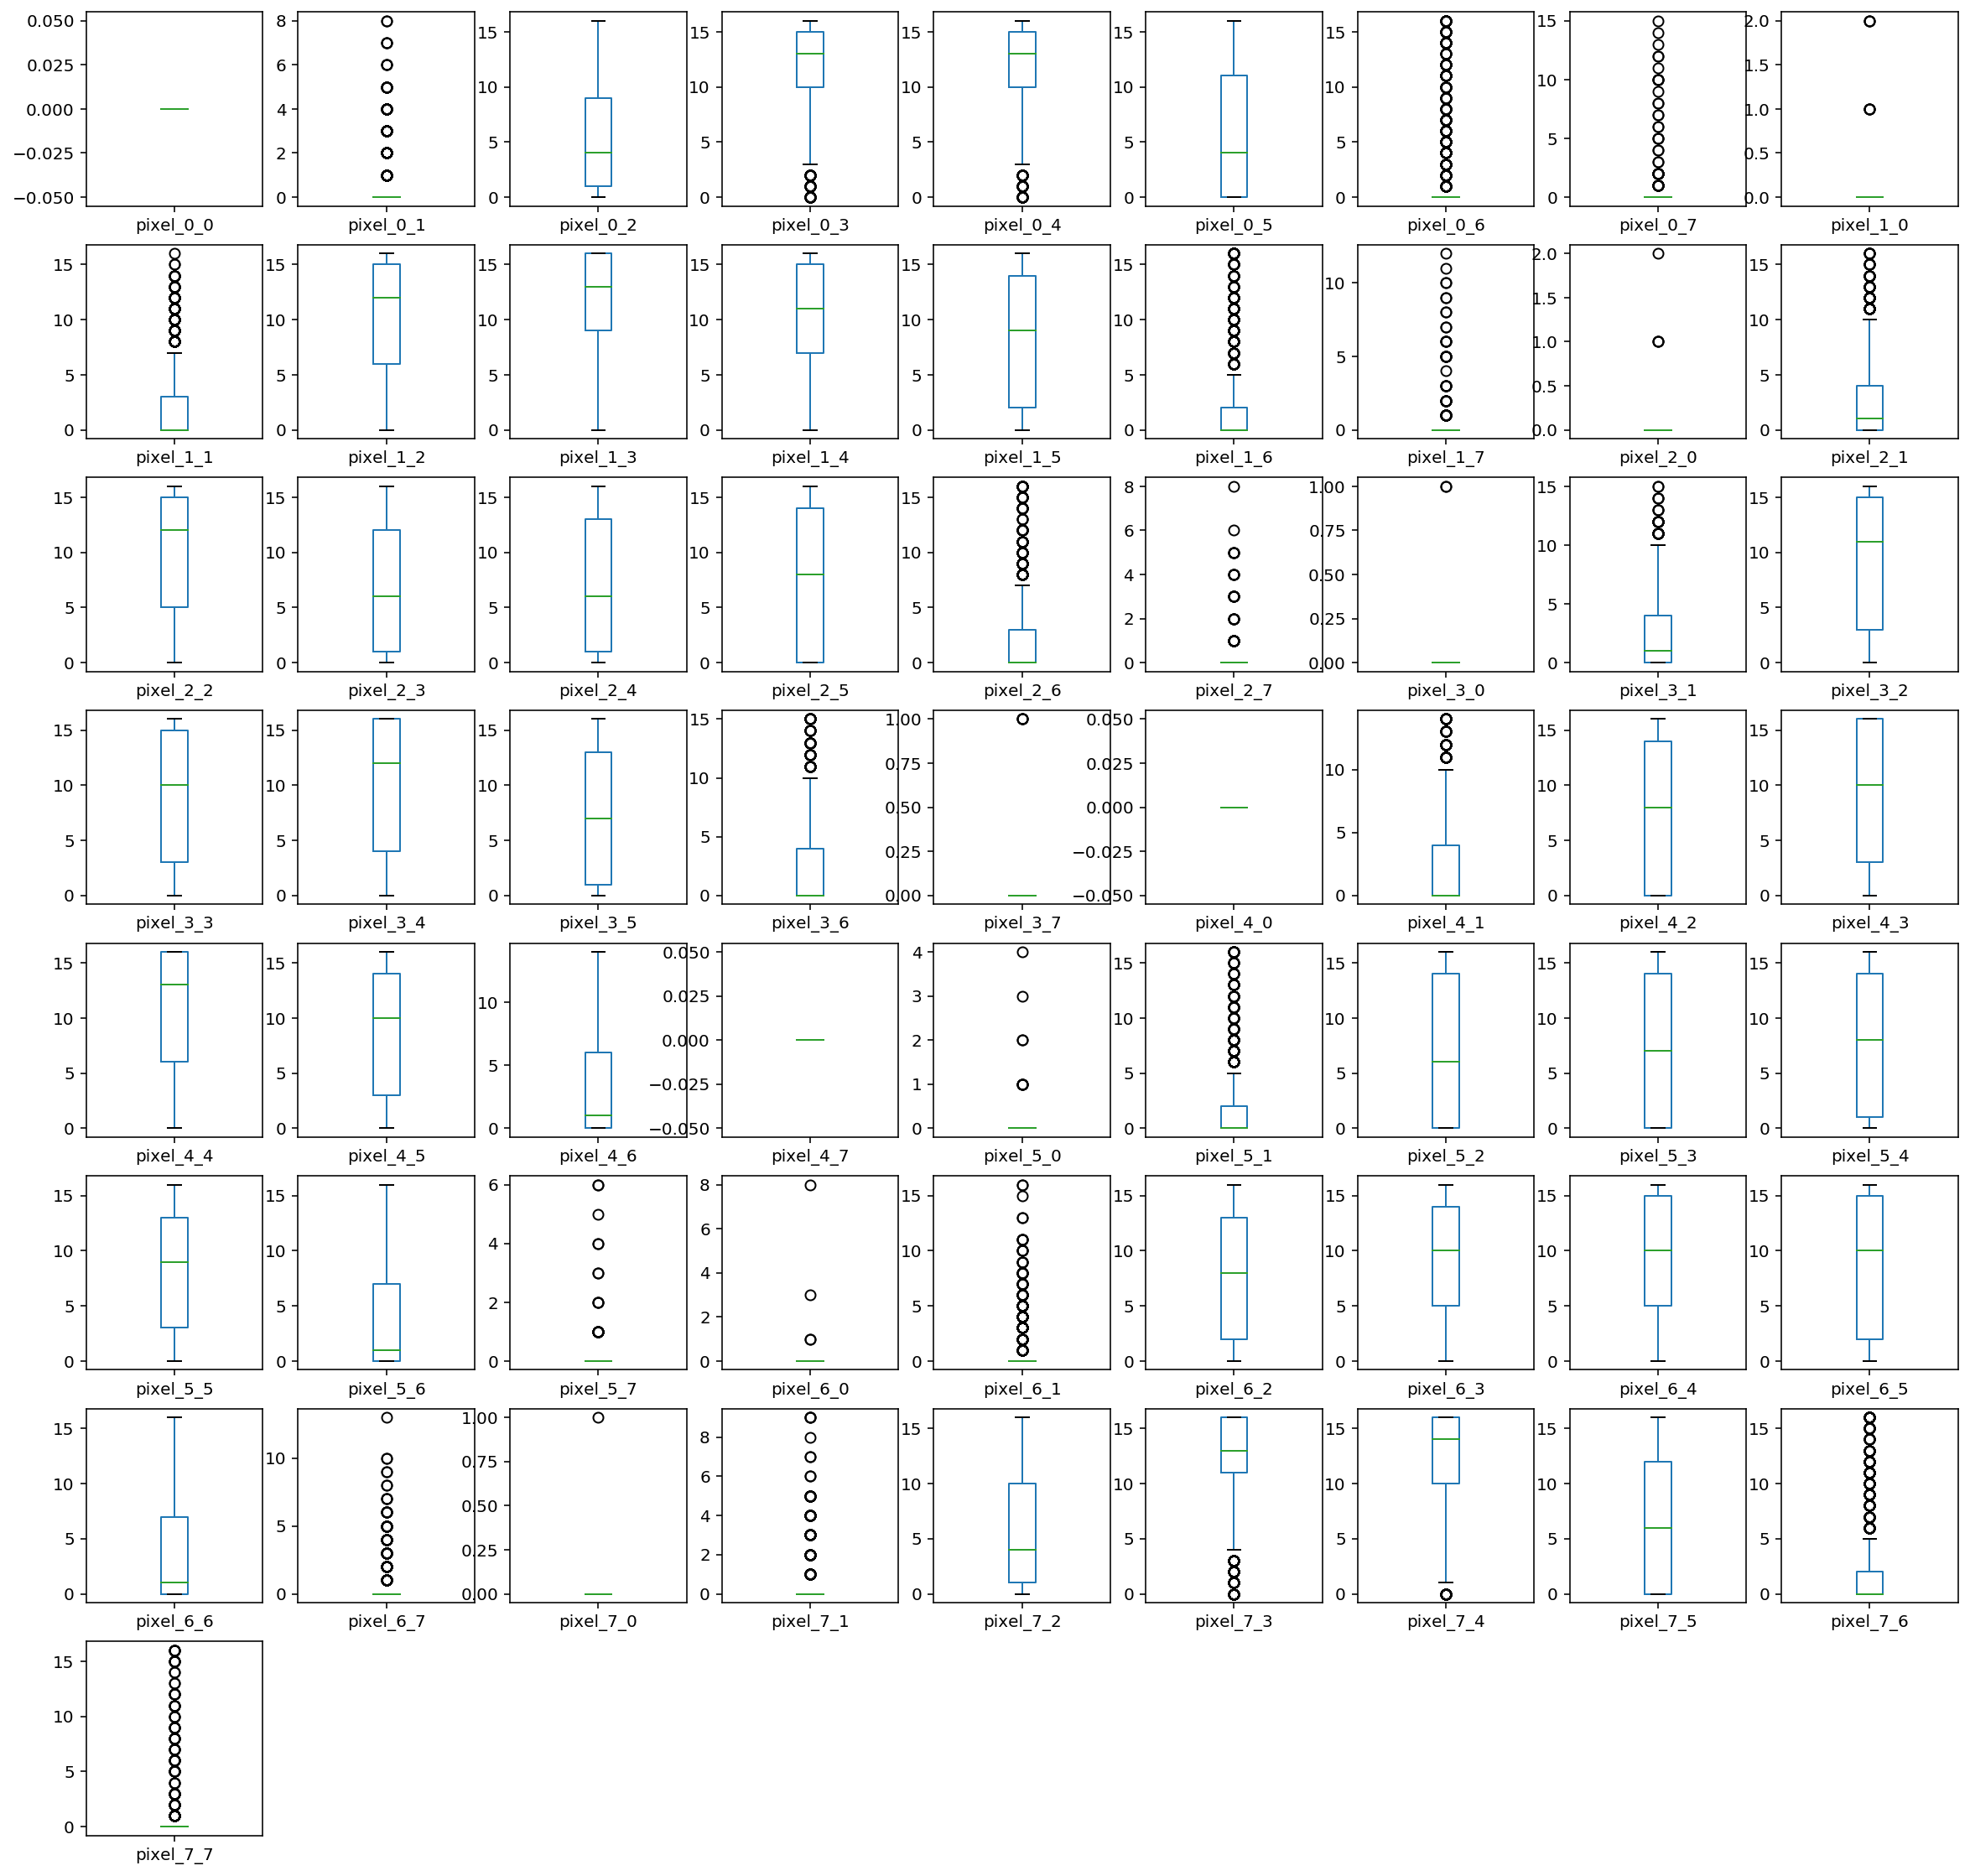

In [13]:
# box and whisker plots
X_data.plot(kind='box', subplots=True, layout=(8,9), sharex=False, sharey=False)
plt.show()

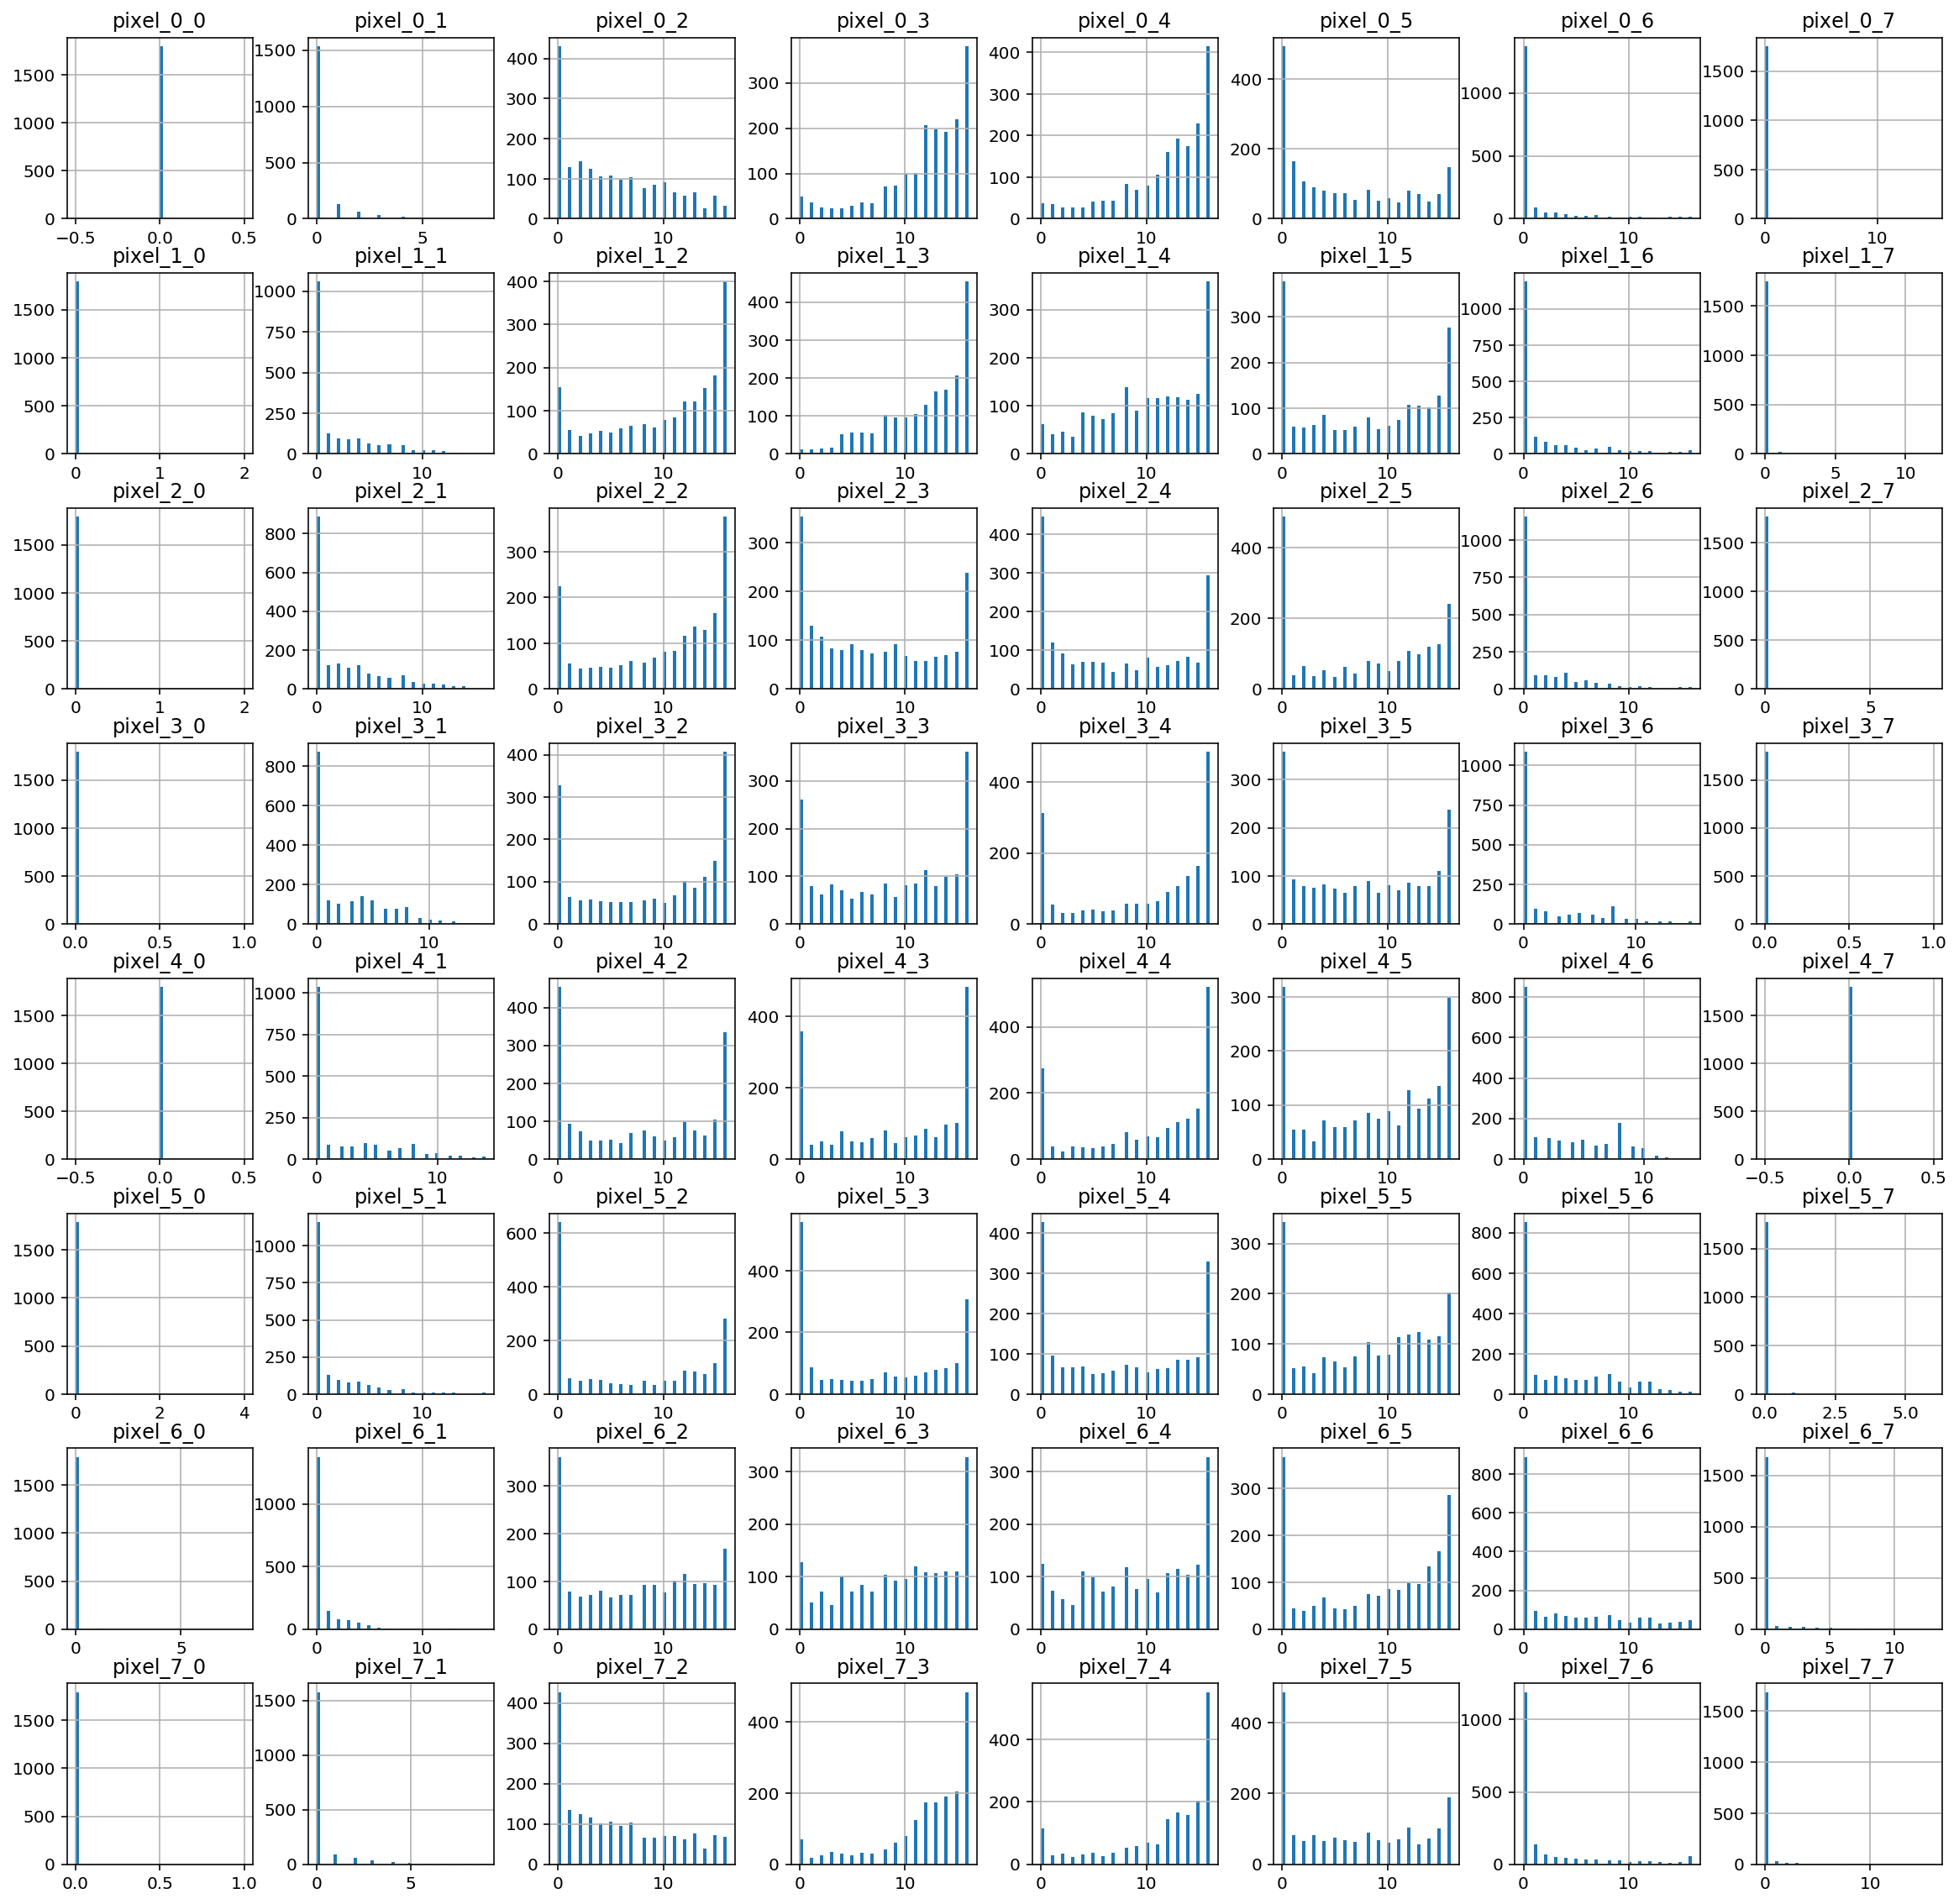

In [14]:
X_data.hist(bins = 50)
plt.show()

In [15]:
#X_data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, sharey=False)
#plt.show()

# Classical Algorithms Evaluation

In [16]:
validation_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=validation_size, random_state=seed)

In [17]:
X_train.shape

(1437, 64)

In [18]:
X_test.shape

(360, 64)

In [19]:
Y_train.shape

(1437, 1)

In [20]:
Y_test.shape

(360, 1)

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
#models.append(('GPC', GaussianProcessClassifier()))
#models.append(('MLP', MLPClassifier()))
#models.append(('ADC', AdaBoostClassifier()))
#models.append(('QDA', QuadraticDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.968701 (0.015599)
LDA: 0.955463 (0.017354)
KNN: 0.988865 (0.005562)
CART: 0.861529 (0.031119)
NB: 0.837879 (0.029575)
SVM: 0.988874 (0.008334)
RFC: 0.977744 (0.014516)


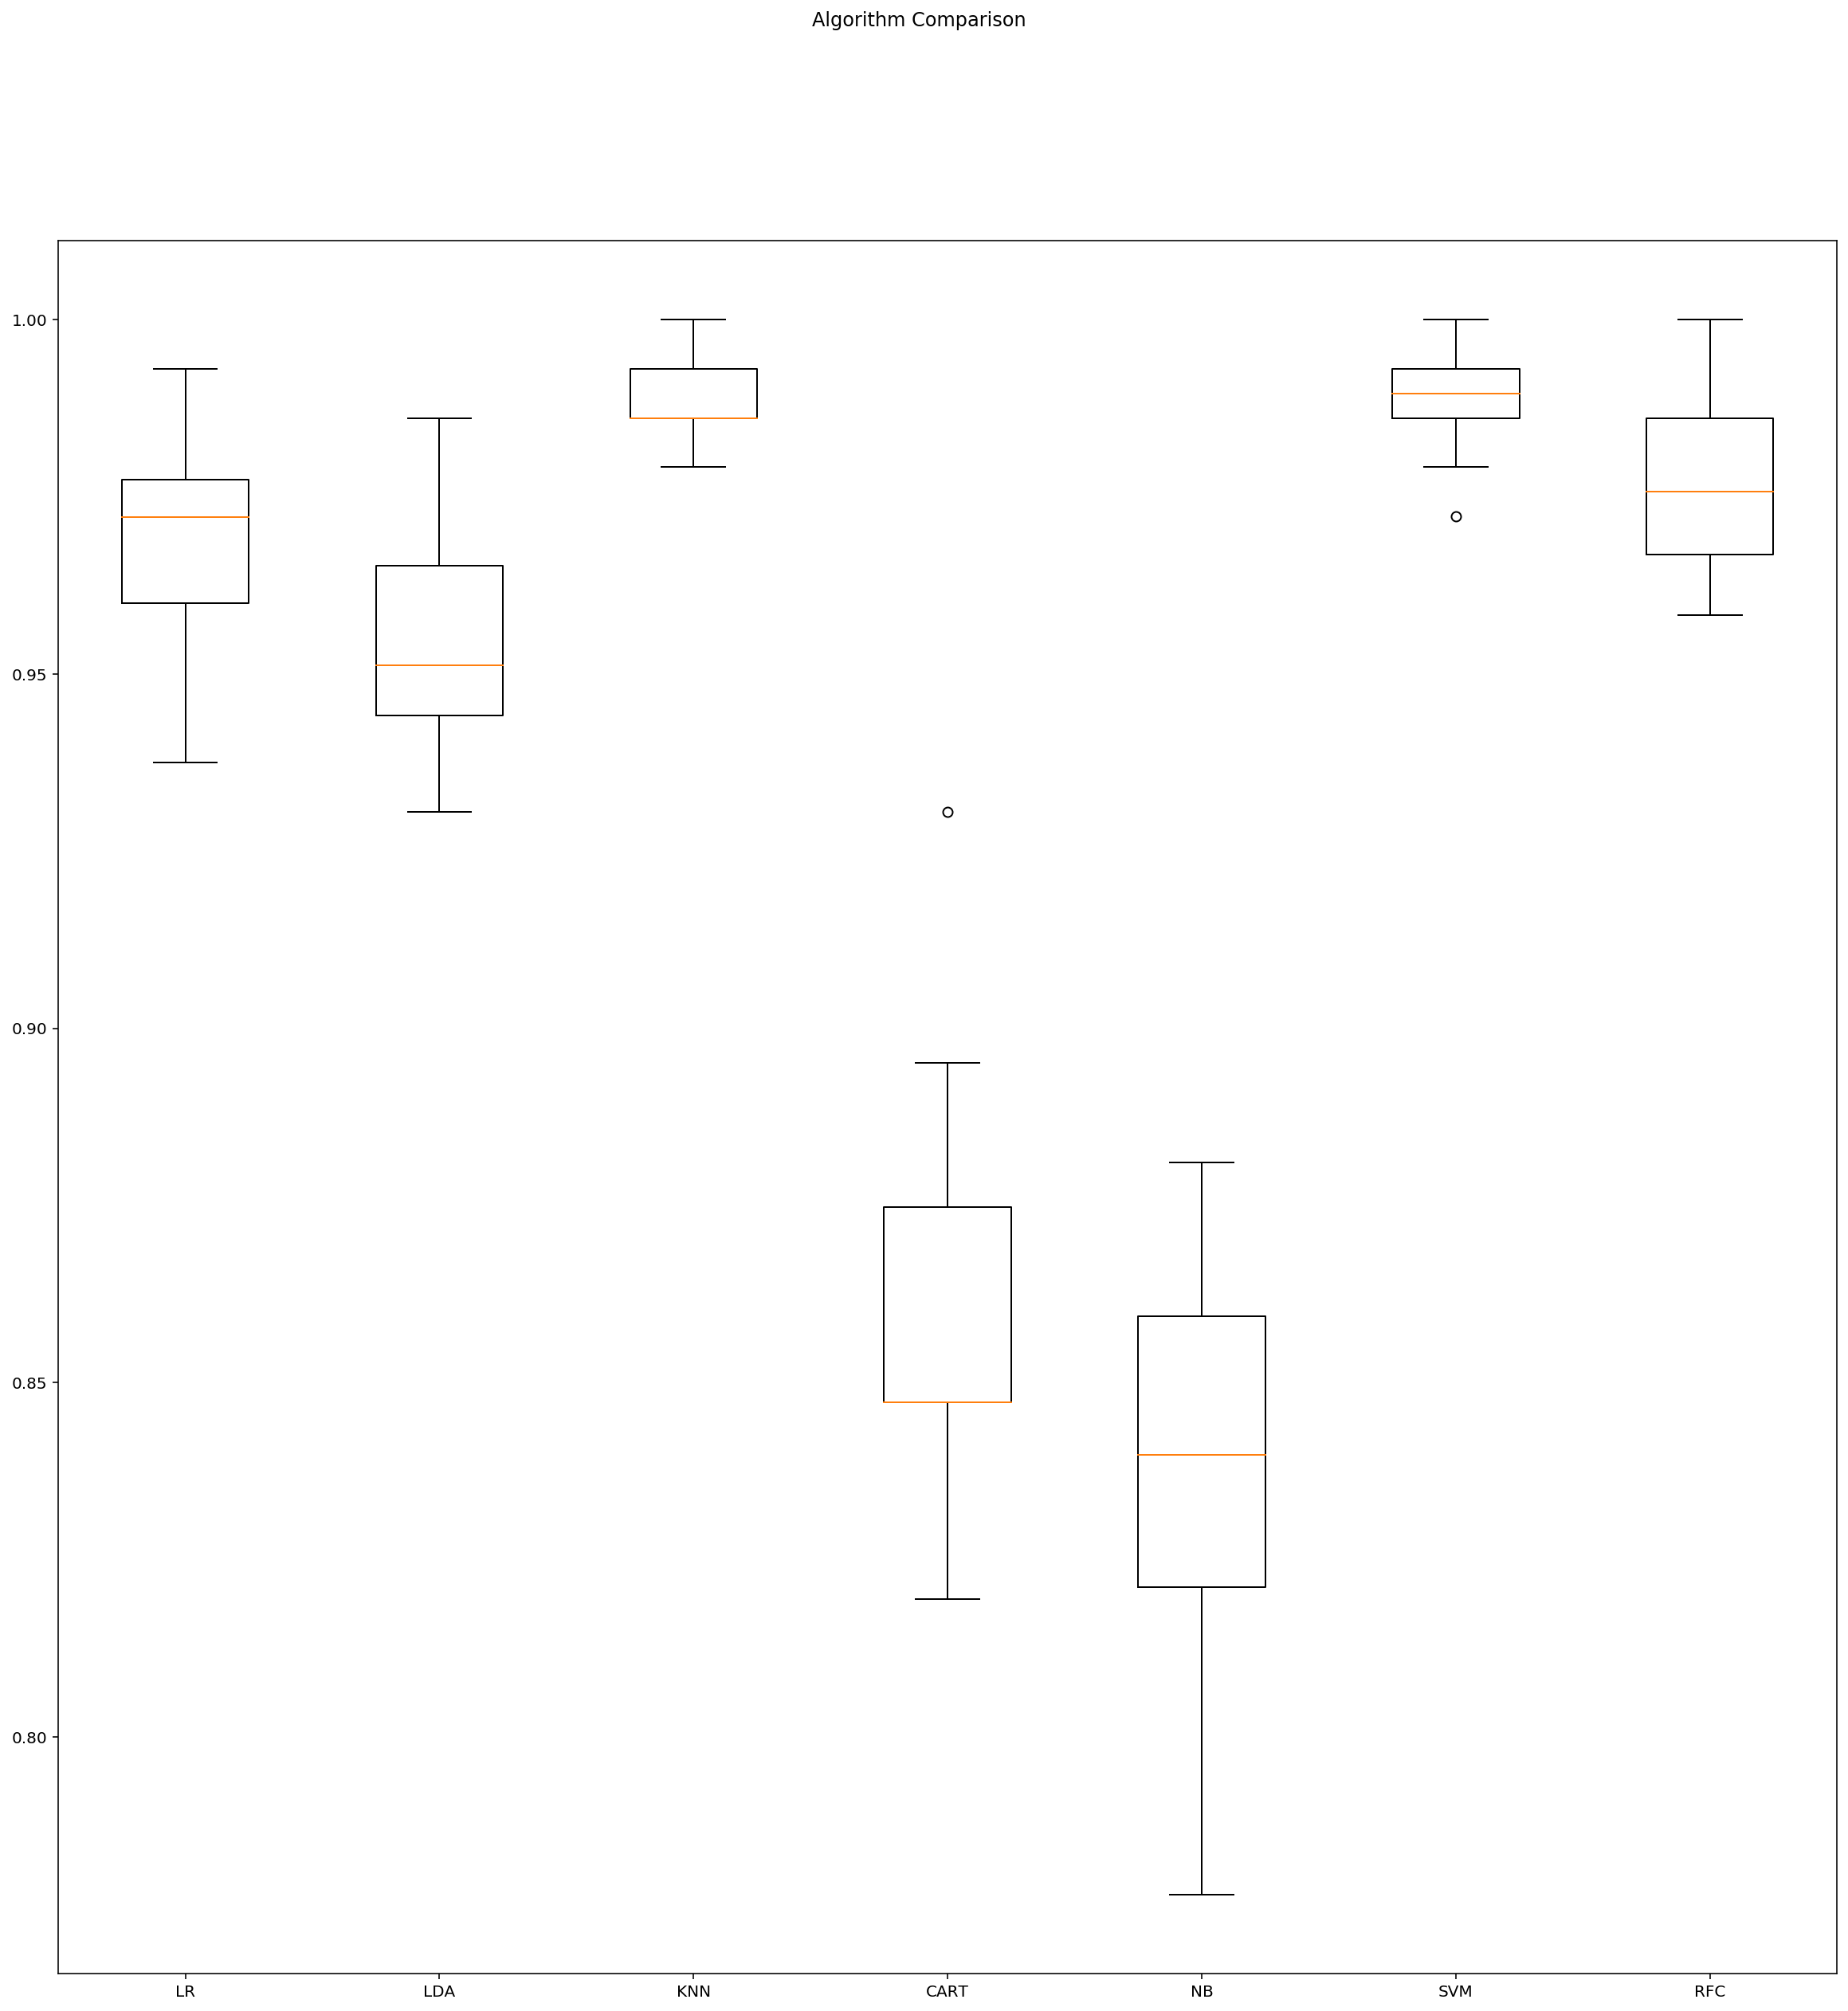

In [22]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# Make predictions on validation dataset
lda = KNeighborsClassifier()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print("Model accuracy: {:.2f}%".format(accuracy*100))
print("")
print(confusion_matrix(Y_test, predictions))
print("")
print(classification_report(Y_test, predictions))

Model accuracy: 97.50%

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  1  0  1]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  1  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  1  0  1  0  0  0  0 41  0]
 [ 0  1  0  2  0  1  0  0  0 28]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       0.91      0.94      0.93        34
           4       1.00      1.00      1.00        37
           5       0.97      1.00      0.98        28
           6       1.00      0.96      0.98        28
           7       0.97      1.00      0.99        33
           8       0.98      0.95      0.96        43
           9       0.97      0.88      0.92        32

    accuracy                           0.97     

# Best predictors selection (testing only)

In [24]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, Y_train)

In [25]:
scores = fit.scores_

In [26]:
combined = dict(zip(data.feature_names[:6], scores[:6]))
combined = dict(sorted(combined.items(), key=lambda x:x[1], reverse=True))

json_object = json.dumps(combined, indent = 4) 
print(json_object)

{
    "pixel_0_0": NaN,
    "pixel_0_5": 3185.676310155488,
    "pixel_0_2": 2773.2046445147985,
    "pixel_0_1": 605.1279451654302,
    "pixel_0_3": 559.6919065439346,
    "pixel_0_4": 354.84245507541823
}


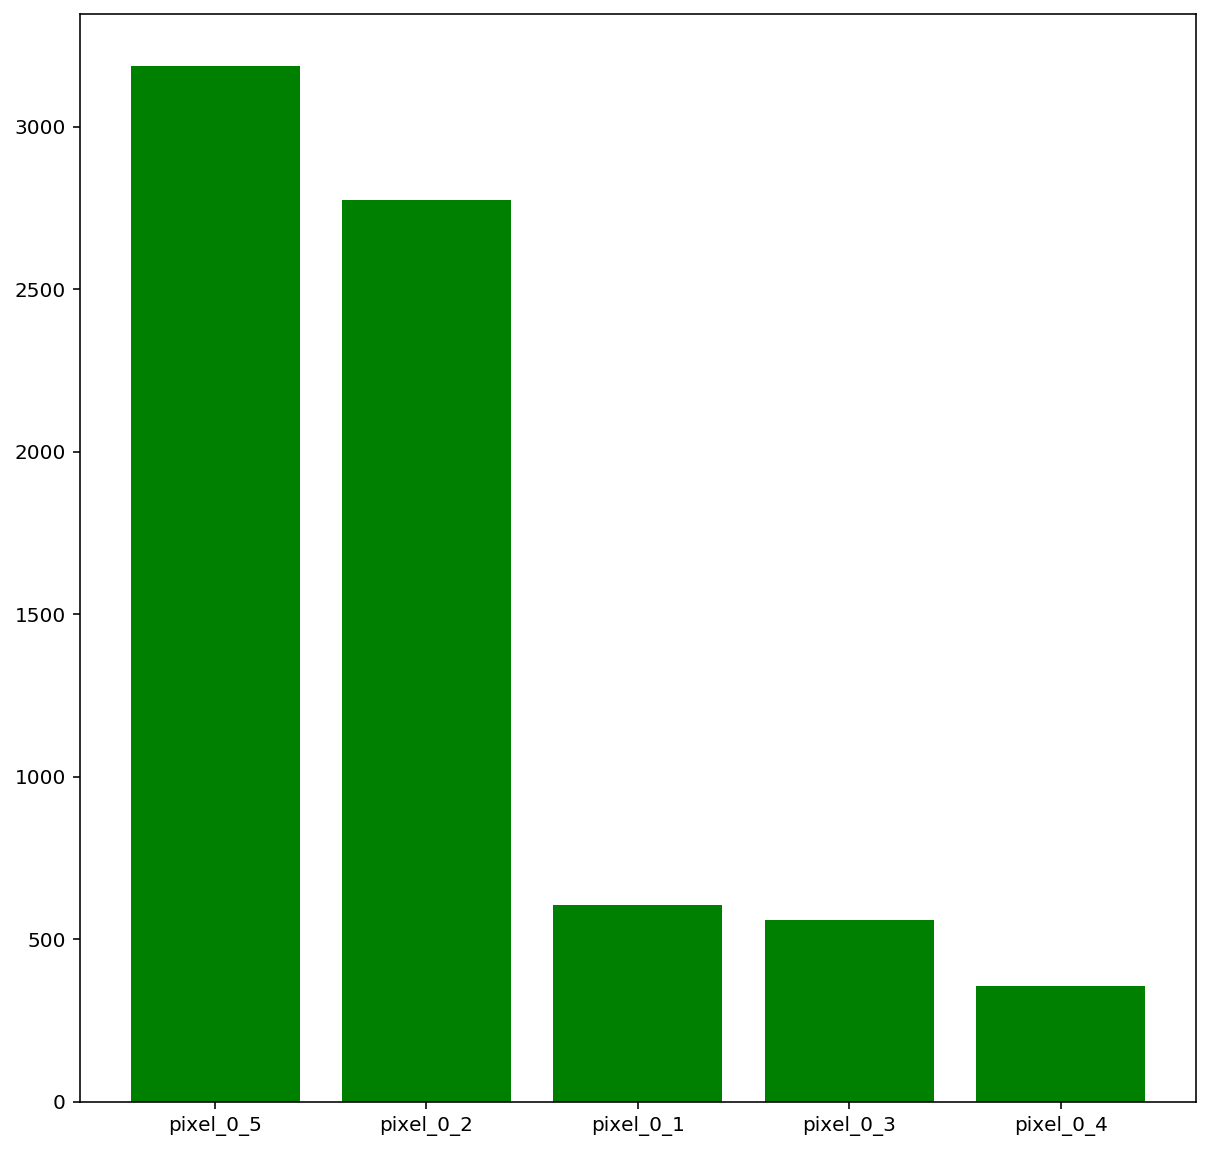

In [27]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.bar(combined.keys(), combined.values(), color='g')
plt.show()

# Ensemble algorithms

In [28]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)

# create the sub models
estimators = []
model1 = LinearDiscriminantAnalysis()

estimators.append(('lda', model1))
#model2 = DecisionTreeClassifier()
#estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [29]:
# create the ensemble model
ensemble = StackingClassifier(estimators)
results = cross_val_score(ensemble, X_data, Y_data, cv=kfold)
print(results.mean())

0.9805245189323403


In [32]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))) 
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVC', SVC())]))) 

results = []
names = []

num_folds = 10
scoring = 'neg_mean_squared_error'

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -125308141202611208192.000000 (375924423607829528576.000000)
ScaledLASSO: -7.911216 (0.858252)
ScaledEN: -6.764244 (0.779831)
ScaledKNN: -0.397096 (0.125881)
ScaledCART: -2.646688 (0.482547)
ScaledSVR: -1.193170 (0.147947)
ScaledSVC: -0.233664 (0.201371)


In [33]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('RFC', RandomForestClassifier()))

scoring = 'neg_mean_squared_error' # less value less error
num_folds = 10
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -13.035072 (2.379751)
GBM: -0.770989 (0.580721)
RF: -0.290637 (0.321268)
ET: -0.253176 (0.267138)
RFC: -0.400612 (0.315977)


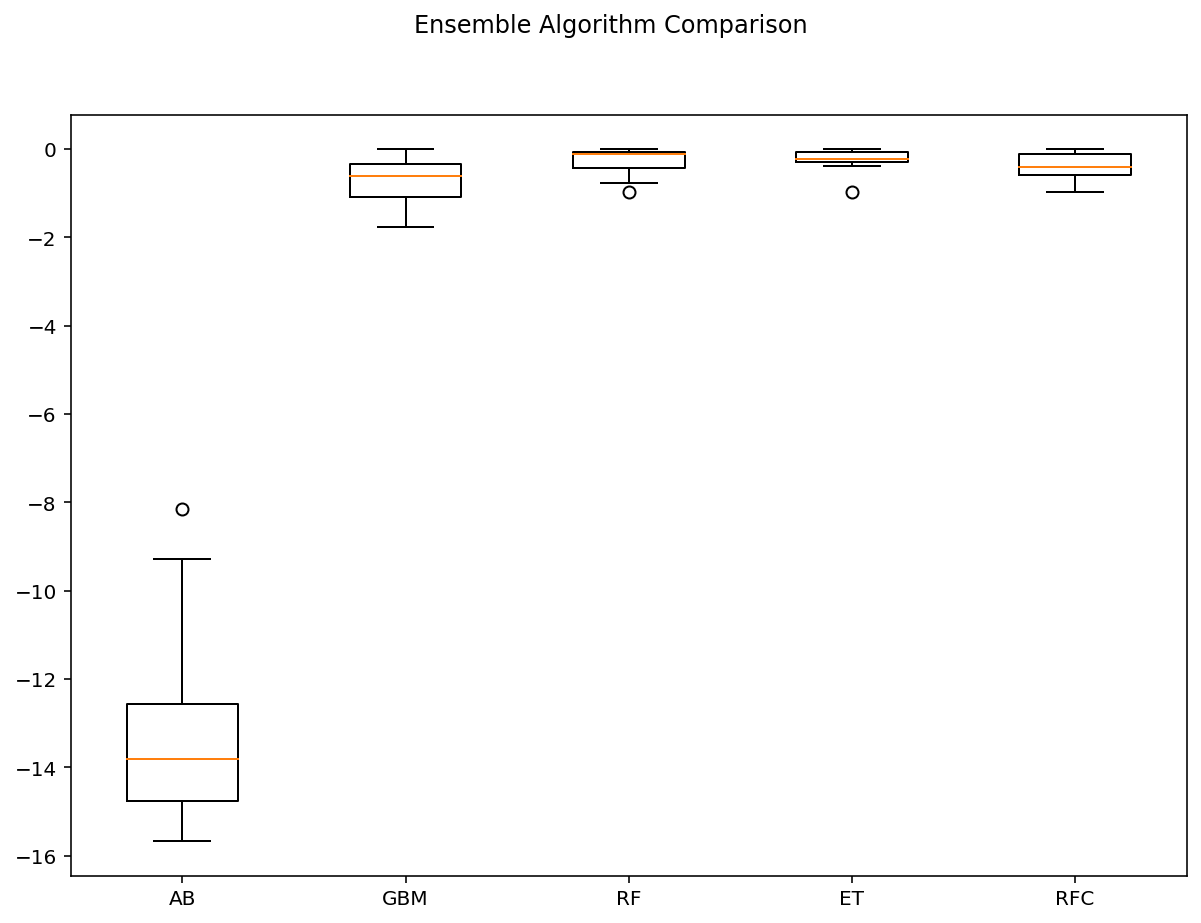

In [34]:
# Compare Algorithms
plt.rcParams['figure.figsize'] = [10, 7]
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
cart = LinearDiscriminantAnalysis()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_data, Y_data, cv=kfold)
print(results.mean())

0.9515890751086282


In [36]:
from sklearn.model_selection import GridSearchCV

estimator_values = np.array([*range(100, 1000, 100)])

param_grid = dict(n_estimators=estimator_values)

model = ExtraTreesClassifier()

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_data, Y_data)

print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_estimator_.max_features)

0.9582776230269265
400
auto


In [37]:
# create the sub models
estimators = []


model1 = LinearDiscriminantAnalysis()
estimators.append(('lda', model1))

#estimators.append(('standardize', StandardScaler(with_mean=0, with_std=1)))

model2 = SVC(gamma=0.001, max_iter = -1)
estimators.append(('rfc', model2))

#model2 = DecisionTreeClassifier()
#estimators.append(('cart', model2))
#model3 = SVC()
#estimators.append(('svm', model3))

model4 = ExtraTreesClassifier(n_estimators=600, random_state=seed)
estimators.append(('etc', model4))

#model5 = AdaBoostClassifier(n_estimators=600, random_state=seed)
#estimators.append(('adb', model5))

#model6 = BaggingClassifier(base_estimator=model2, n_estimators=400, random_state=seed)
#estimators.append(('bagg', model6))

# create the ensemble model
ensemble = StackingClassifier(estimators)
#ensemble = VotingClassifier(estimators)

#kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=seed)

kfold = KFold(n_splits=10, random_state=seed, shuffle = True)

results = cross_val_score(ensemble, X_data, Y_data, cv=kfold)

print(results.mean())

0.9855307262569832


In [38]:
ensemble.fit(X_train, Y_train)
Y_pred = ensemble.predict(X_test)

In [39]:
accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
print("Model accuracy: {:.2f}%".format(accuracy))

Model accuracy: 98.89%


Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  1]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  1  0  0  0 31]]


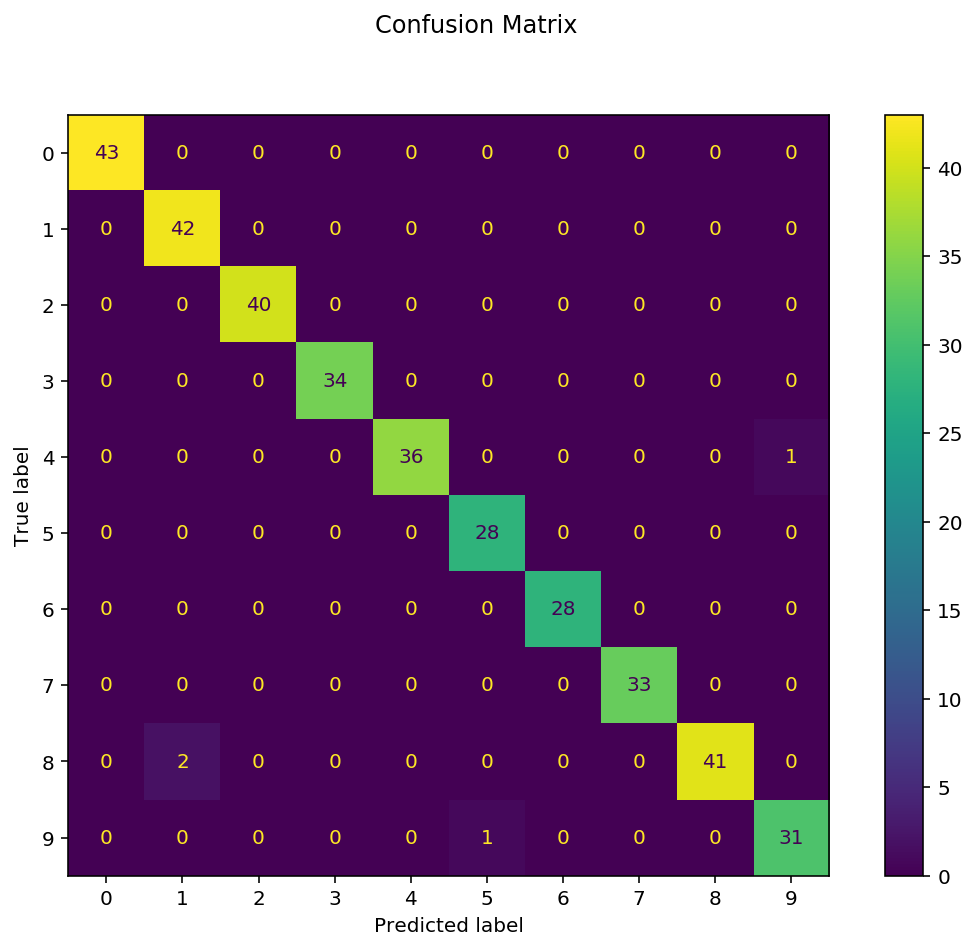

In [40]:
plt.rcParams['figure.figsize'] = [10, 7]
disp = ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()